In [3]:
import sys
sys.path.append('/home/brunelle/anaconda3/envs/env_two/lib/python3.9/site-packages')

import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

# Création d'un dataframe fictif
n_records = 496172
gender = random.choices(['M', 'F'], weights=[0.518, 0.482], k=n_records)
age = [random.choice(["under 19", "10–40", "41–64", "over 64"]) for _ in range(n_records)]
triage_score = random.choices(['White', 'Green', 'Yellow', 'Red', 'Black'],
                              weights=[0.044, 0.825, 0.118, 0.011, 0.001], k=n_records)
access_mode = random.choices(['Autonomous', 'Via ambulance'],
                             weights=[0.826, 0.174], k=n_records)
time_of_admission = random.choices(['0:00–6:00', '06:00–12:00', '12:00–18:00', '18:00–24:00'],
                                   weights=[0.079, 0.363, 0.366, 0.192], k=n_records)
los = random.choices(['> 3h', '< 3h'], weights=[0.289, 0.711], k=n_records)

# Création du dataframe
df = pd.DataFrame({
    'Gender': gender,
     'Age': age,
    'Triage Score': triage_score,
    'Access Mode': access_mode,
    'Time of Admission': time_of_admission,
    'LOS': los
})

df


,Gender,Age,Triage Score,Access Mode,Time of Admission,LOS
0,F,over 64,Green,Autonomous,18:00–24:00,< 3h
1,F,under 19,Green,Autonomous,12:00–18:00,< 3h
2,F,10–40,Green,Autonomous,06:00–12:00,> 3h
3,F,under 19,Green,Autonomous,12:00–18:00,< 3h
4,M,10–40,Green,Via ambulance,12:00–18:00,< 3h
...,...,...,...,...,...,...
496167,M,10–40,Green,Autonomous,18:00–24:00,< 3h
496168,F,41–64,Green,Via ambulance,12:00–18:00,< 3h
496169,M,41–64,Green,Autonomous,18:00–24:00,> 3h
496170,F,over 64,Green,Via ambulance,06:00–12:00,< 3h


In [4]:
df.to_csv('data_ED.csv', index=False)

/home/brunelle/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


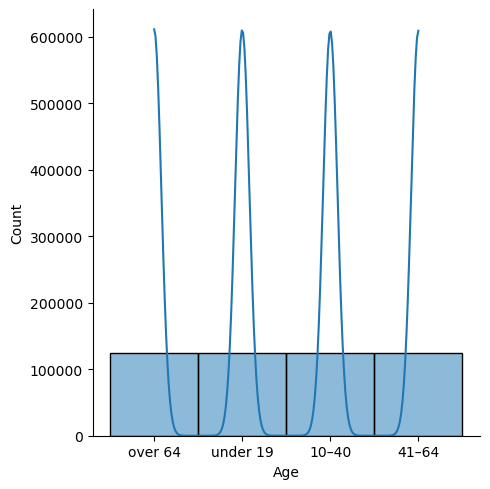

In [5]:

sns.displot(df['Age'], kde='True', bins='auto')

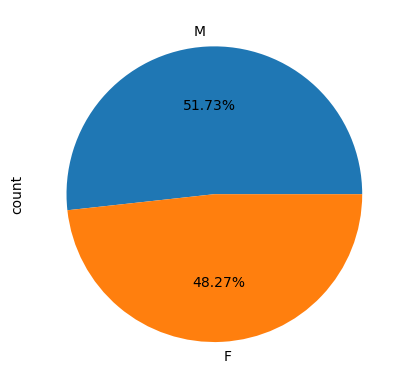

In [6]:
df['Gender'].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.show()

<Axes: xlabel='Triage Score', ylabel='count'>

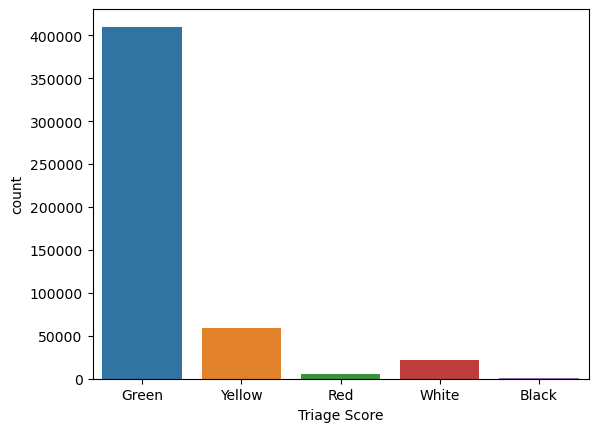

In [7]:
sns.countplot(x='Triage Score',data=df)


<Axes: xlabel='Access Mode', ylabel='count'>

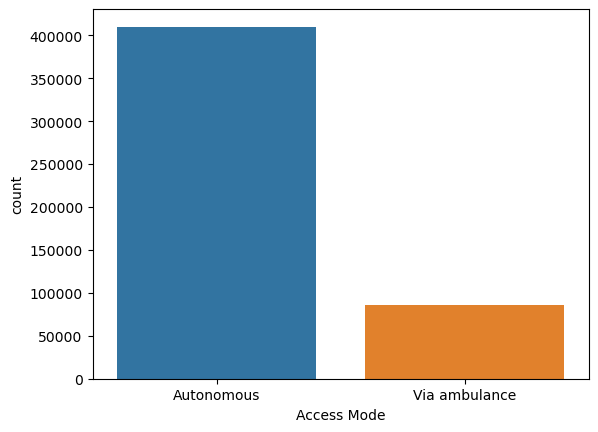

In [8]:
sns.countplot(x='Access Mode', data=df)


In [9]:
from sklearn.preprocessing import LabelEncoder


In [18]:
lc=LabelEncoder()
cols=['Gender', 'Age', 'Triage Score', 'Access Mode', 'Time of Admission','LOS']
for i in cols:
  df[i]=lc.fit_transform(df[i])

In [19]:
X=df.drop(['LOS'],axis=1)
y=df['LOS']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 26)

In [23]:
from sklearn.ensemble import RandomForestClassifier


In [24]:
model1 = RandomForestClassifier(n_estimators=100)
model1.fit(X_train,y_train)

RandomForestClassifier()

In [17]:
predictions = model1.predict(X_test)
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7129699298632198